In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from bokeh.plotting import figure, show, output_file
from bokeh.io import output_notebook
from bokeh.models import ColumnDataSource
from bokeh.layouts import row, column
import numpy as np
from pathlib import Path
import os

# Загрузка данных и знакомство с ними

In [2]:
path = str(Path(os.getcwd()).parent.absolute())

In [3]:
train_data = pd.read_csv(path + "/data/train.csv")

* battery_power (Мощность батареи, мАч) — количество энергии, которое может содержать батарея телефона. Более высокая мощность батареи позволяет телефону работать дольше без подзарядки.
* blue (Наличие Bluetooth) — бинарный признак (0 или 1), который указывает на наличие поддержки Bluetooth. Если значение 1, телефон поддерживает Bluetooth; если 0, то нет.
* clock_speed (Частота процессора, ГГц) — скорость работы процессора телефона. Более высокая частота означает, что процессор может выполнять больше операций в единицу времени.
* dual_sim (Поддержка двух SIM-карт) — бинарный признак (0 или 1), который указывает на возможность использования двух SIM-карт одновременно.
* fc (Фронтальная камера, МП) — количество мегапикселей у фронтальной (селфи) камеры телефона. Большие значения могут указывать на лучшее качество фотографий.
* four_g (Поддержка 4G) — бинарный признак (0 или 1), который указывает на наличие поддержки сети 4G. Если 1 — поддержка 4G есть, если 0 — нет.
* int_memory (Встроенная память, ГБ) — объем внутренней памяти телефона, измеряется в гигабайтах (ГБ). Это память, которая используется для хранения приложений, фотографий, видео и * других данных.
* m_dep (Глубина телефона, см) — толщина телефона, измеренная в сантиметрах. Это физический параметр устройства.
* mobile_wt (Вес телефона, граммы) — вес телефона, измеренный в граммах. Более легкие телефоны обычно считаются более удобными.
* n_cores (Количество ядер процессора) — количество ядер в процессоре телефона. Чем больше ядер, тем выше способность устройства к многозадачности.
* pc (Основная камера, МП) — количество мегапикселей у основной камеры телефона. Чем выше значение, тем лучше теоретически качество фотографий.
* px_height (Высота экрана в пикселях) — количество пикселей по вертикали экрана телефона. Чем больше пикселей, тем более четким и детализированным будет изображение.
* px_width (Ширина экрана в пикселях) — количество пикселей по горизонтали экрана телефона. Чем больше пикселей, тем лучше разрешение экрана.
* ram (Оперативная память, МБ) — объем оперативной памяти телефона, измеряется в мегабайтах (МБ). Больший объем оперативной памяти позволяет телефону обрабатывать больше данных * одновременно, улучшая его производительность.
* sc_h (Высота экрана, см) — физическая высота экрана телефона, измеренная в сантиметрах.
* sc_w (Ширина экрана, см) — физическая ширина экрана телефона, измеренная в сантиметрах.
* talk_time (Время разговора, часы) — количество часов, в течение которых телефон может поддерживать непрерывный разговор без подзарядки.
* three_g (Поддержка 3G) — бинарный признак (0 или 1), который указывает на наличие поддержки сети 3G. Если 1 — поддержка 3G есть, если 0 — нет.
* touch_screen (Наличие сенсорного экрана) — бинарный признак (0 или 1), который указывает на наличие сенсорного экрана. Если 1 — экран сенсорный, если 0 — нет.
* wifi (Наличие Wi-Fi) — бинарный признак (0 или 1), который указывает на наличие поддержки Wi-Fi. Если 1 — Wi-Fi поддерживается, если 0 — нет.
* price_range (Ценовая категория) — целевой признак, который указывает на ценовую категорию телефона

In [4]:
train_data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [5]:
# Load the dataset
df = train_data.copy()

# Display basic information about the dataset
# print(df.info())
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [17]:
df['price_range'].value_counts()

price_range
0    500
1    500
2    500
3    500
Name: count, dtype: int64

# Очистка данных

In [6]:
print('isna\n', df.isna().sum(), sep='')
print('duplicated', df.duplicated().sum())

isna
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64
duplicated 0


#### Редактирование типов данных

In [7]:
df['battery_power'] = df['battery_power'].astype('int16')   
df['blue'] = df['blue'].astype('category')                 
df['clock_speed'] = df['clock_speed'].astype('float16')   
df['dual_sim'] = df['dual_sim'].astype('category')         
df['fc'] = df['fc'].astype('int8')                        
df['four_g'] = df['four_g'].astype('category')             
df['int_memory'] = df['int_memory'].astype('int8')        
df['m_dep'] = df['m_dep'].astype('float32')               
df['mobile_wt'] = df['mobile_wt'].astype('int16')          
df['n_cores'] = df['n_cores'].astype('int8')              
df['pc'] = df['pc'].astype('int8')                        
df['px_height'] = df['px_height'].astype('int16')          
df['px_width'] = df['px_width'].astype('int16')            
df['ram'] = df['ram'].astype('int16')                      
df['sc_h'] = df['sc_h'].astype('int8')                    
df['sc_w'] = df['sc_w'].astype('int8')                    
df['talk_time'] = df['talk_time'].astype('int8')          
df['three_g'] = df['three_g'].astype('category')           
df['touch_screen'] = df['touch_screen'].astype('category') 
df['wifi'] = df['wifi'].astype('category')                 
df['price_range'] = df['price_range'].astype('category')  

* Провели редактирование типов, за счет чего в несколько раз уменьшили вес датасета, при этом не потеряв информацию
* Не обнаружили дублитов и пропущеных значений

Категориальные признаки

In [8]:
cat_features = df.select_dtypes(include=['category']).columns.to_list()
cat_features

['blue',
 'dual_sim',
 'four_g',
 'three_g',
 'touch_screen',
 'wifi',
 'price_range']

Числовые признаки

In [9]:
num_features = df.select_dtypes(include=['number']).columns.to_list()
num_features

['battery_power',
 'clock_speed',
 'fc',
 'int_memory',
 'm_dep',
 'mobile_wt',
 'n_cores',
 'pc',
 'px_height',
 'px_width',
 'ram',
 'sc_h',
 'sc_w',
 'talk_time']

### Анализ признаков для модели

#### Heatmap

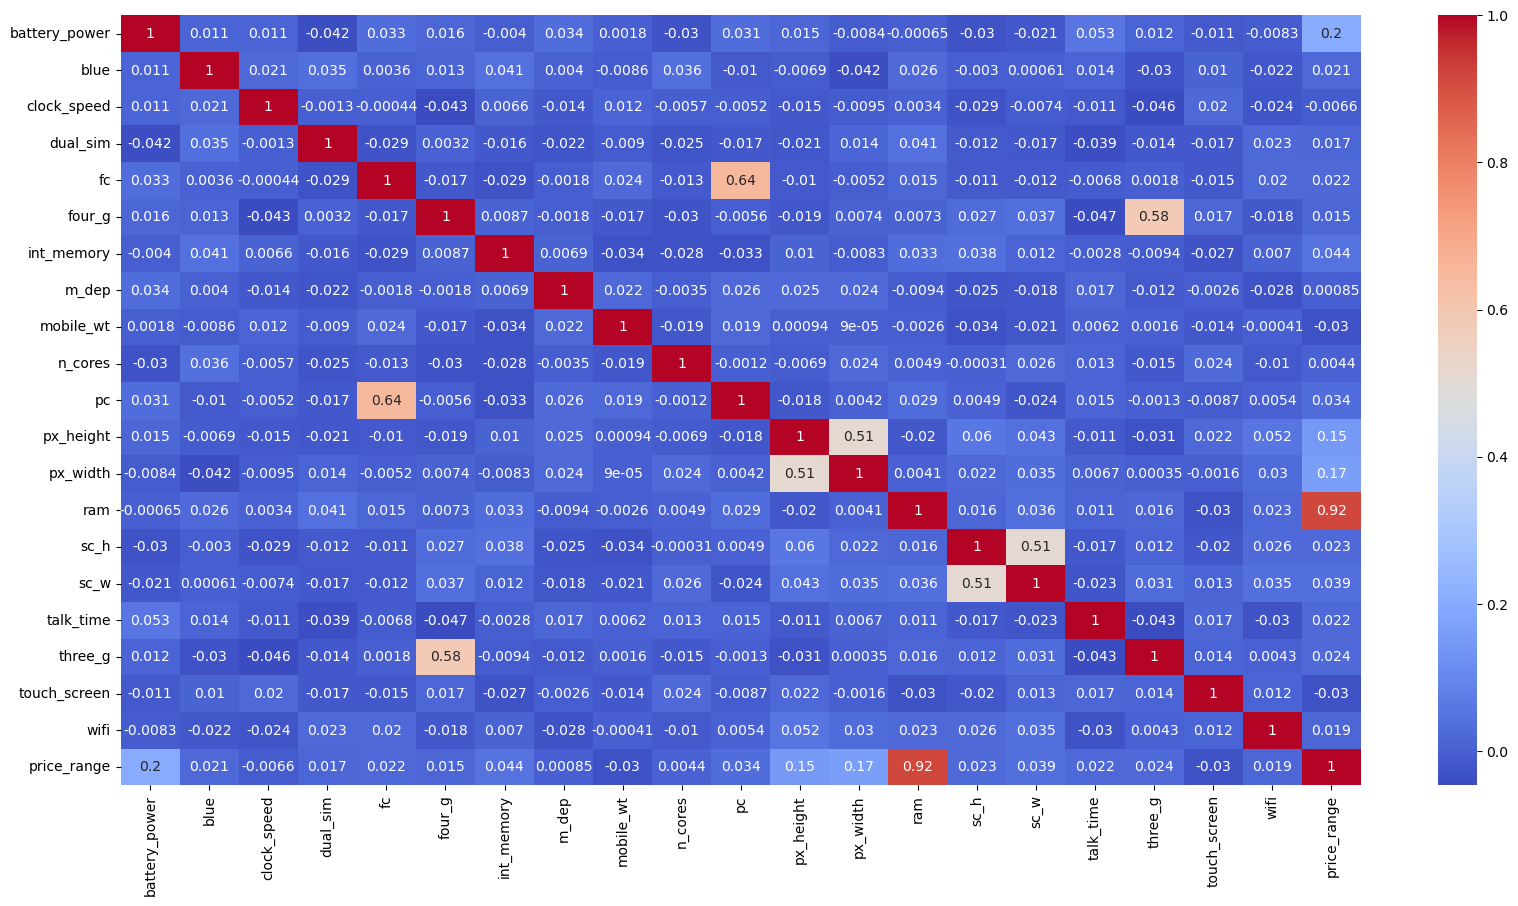

In [10]:
# Correlation matrix
plt.figure(figsize=(20, 10))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


#### Зависимость цены от ОЗУ

In [11]:
# Bokeh for interactive visualization
output_notebook()

# Scatter plot with Bokeh
source = ColumnDataSource(df)

# Create a new plot with a title and axis labels
p = figure(title="Mobile Price Classification", x_axis_label='ram', y_axis_label='price_range')#, plot_height=400, plot_width=700)

# Add a circle renderer with a size, color, and alpha
p.circle('ram', 'price_range', size=10, color="navy", alpha=0.5, source=source)

# Show the results
show(p)


Loading BokehJS ...

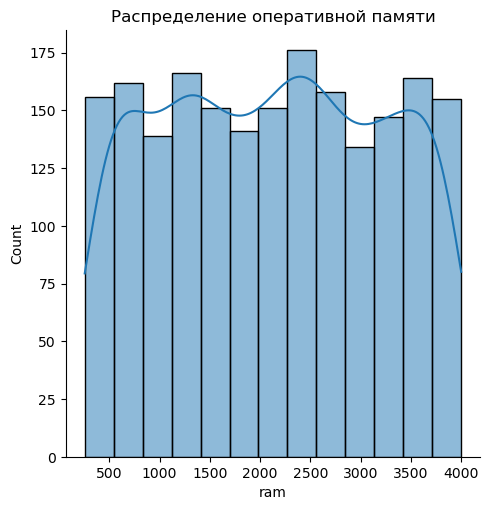

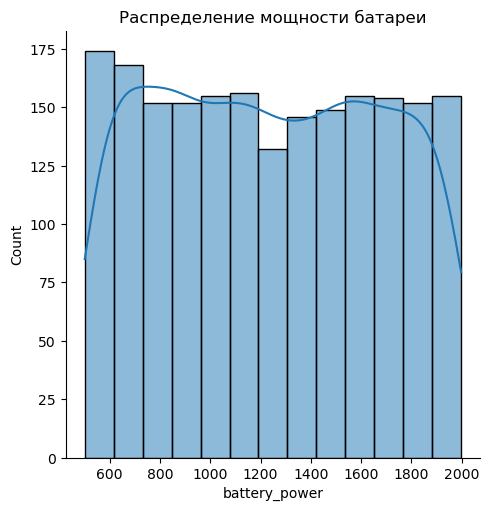

In [12]:
# Например, распределение оперативной памяти (ram)
sns.displot(data=df, x='ram', kde=True)
plt.title('Распределение оперативной памяти')
plt.show()

# Распределение мощности батареи (battery_power)
sns.displot(data=df, x='battery_power', kde=True)
plt.title('Распределение мощности батареи')
plt.show()

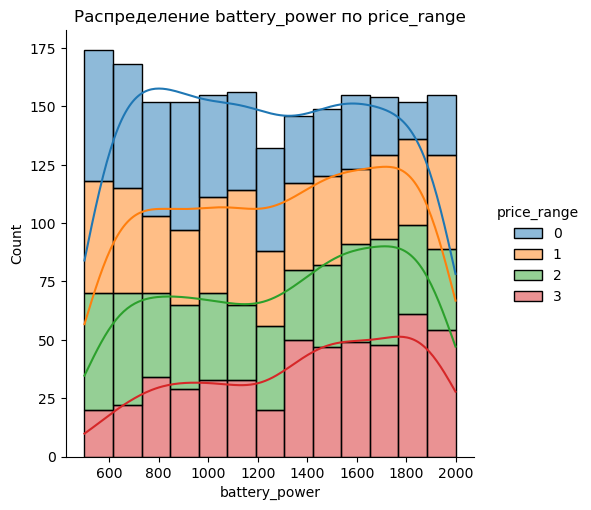

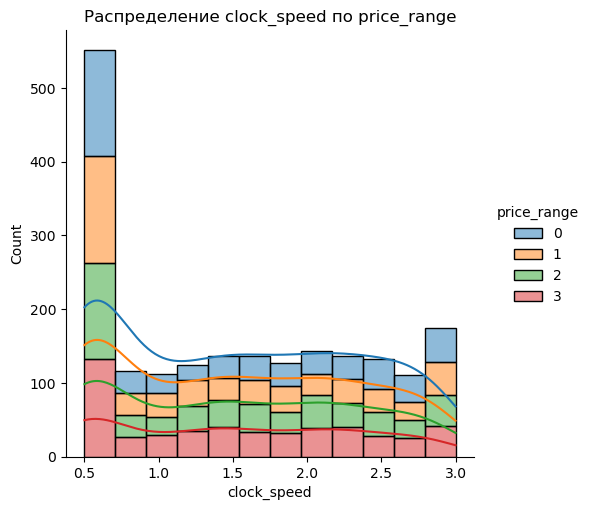

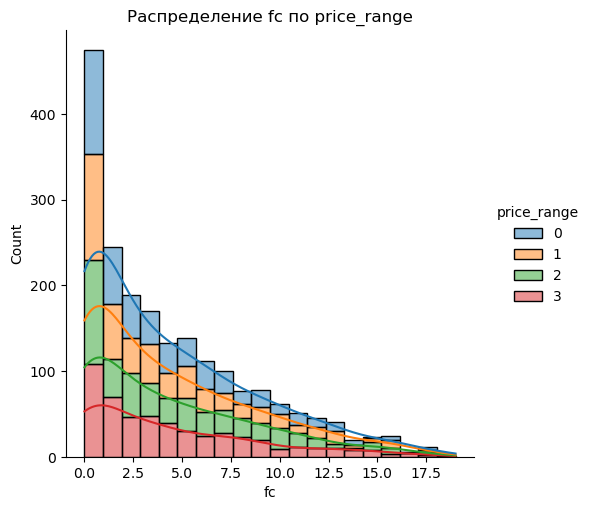

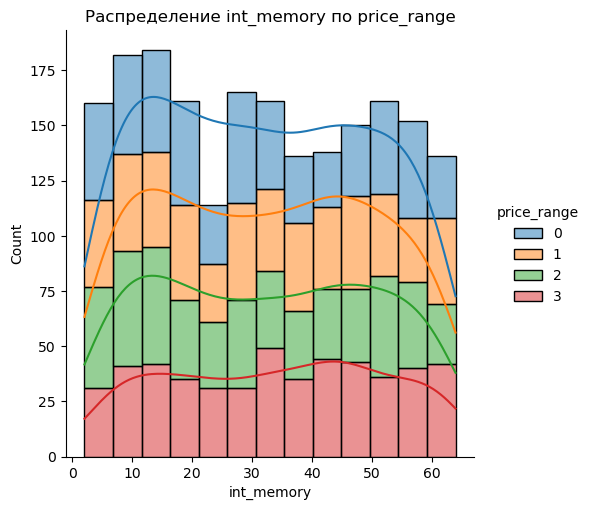

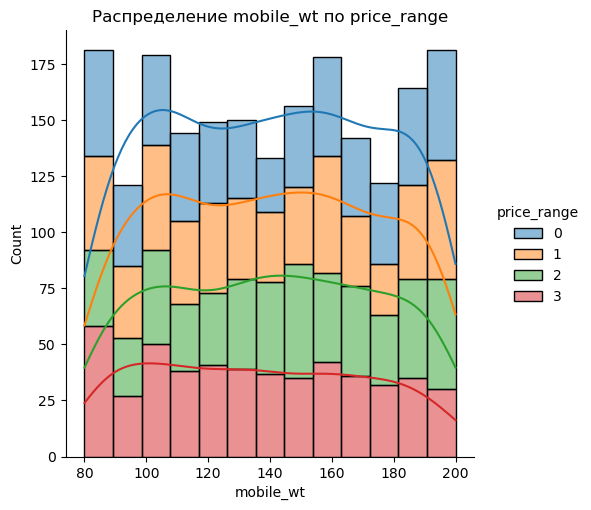

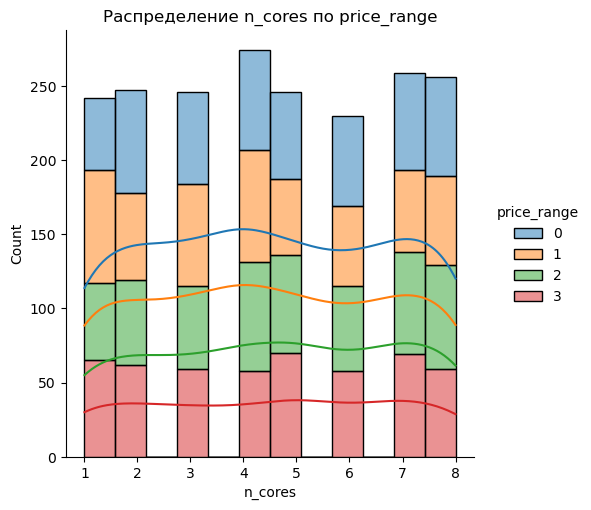

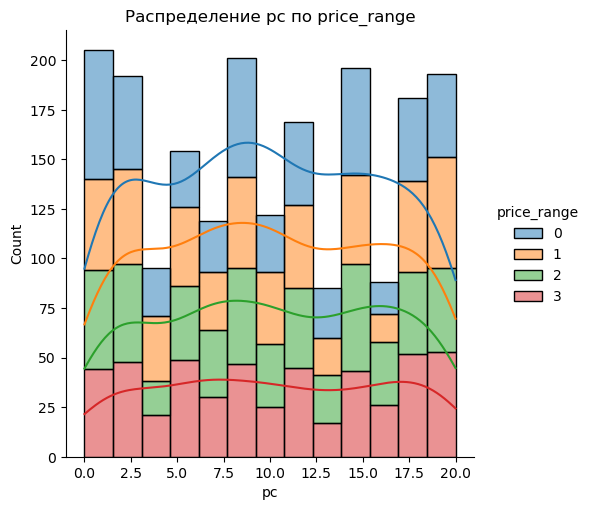

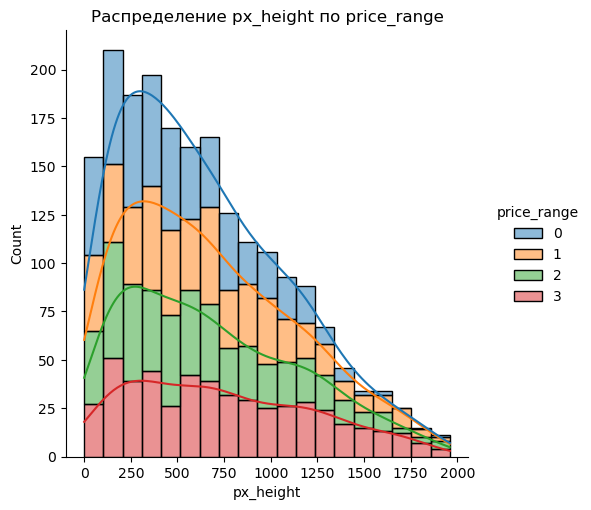

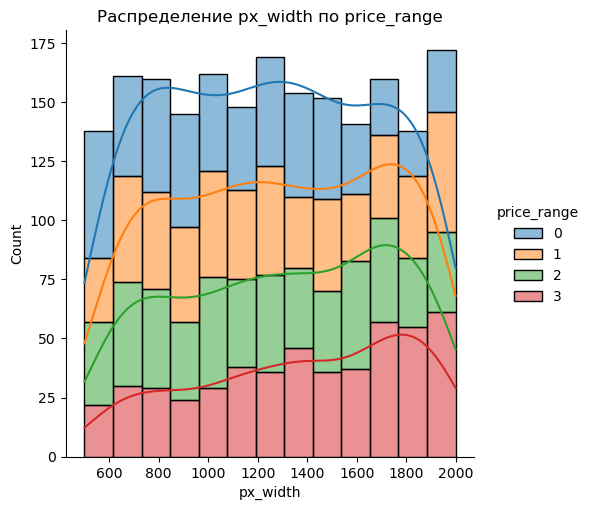

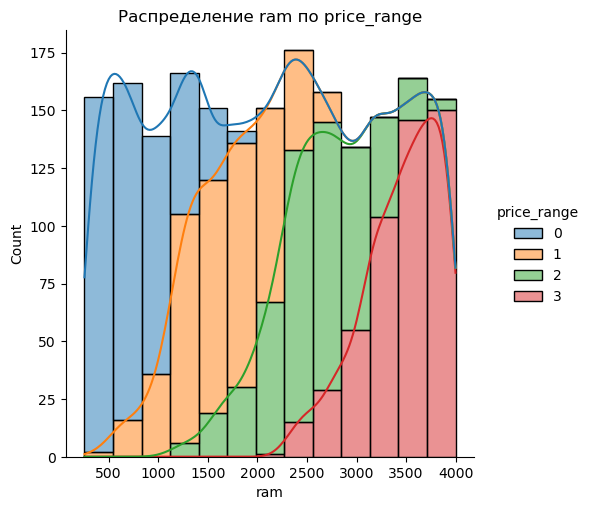

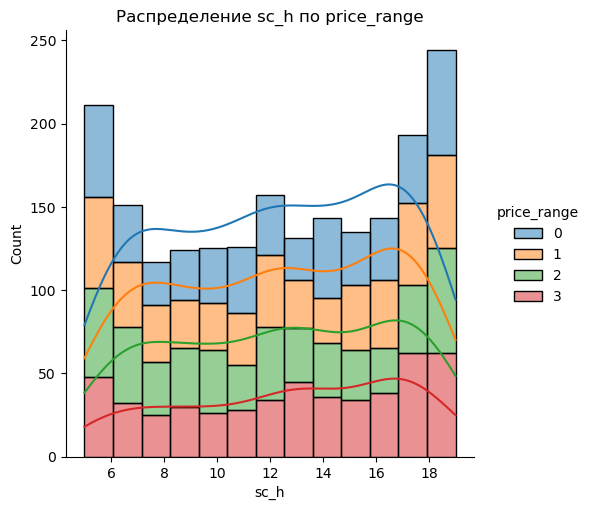

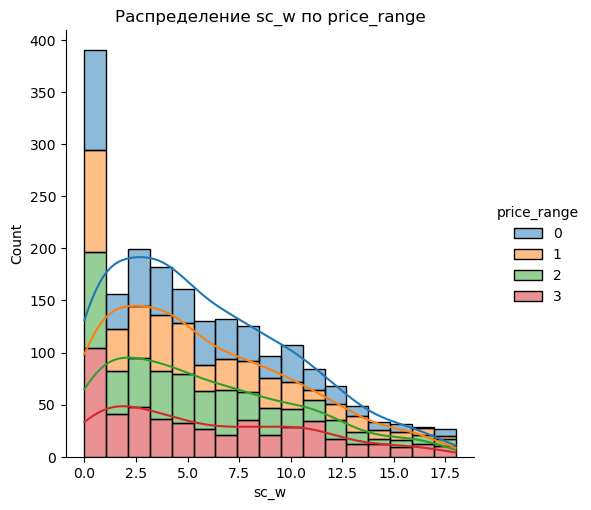

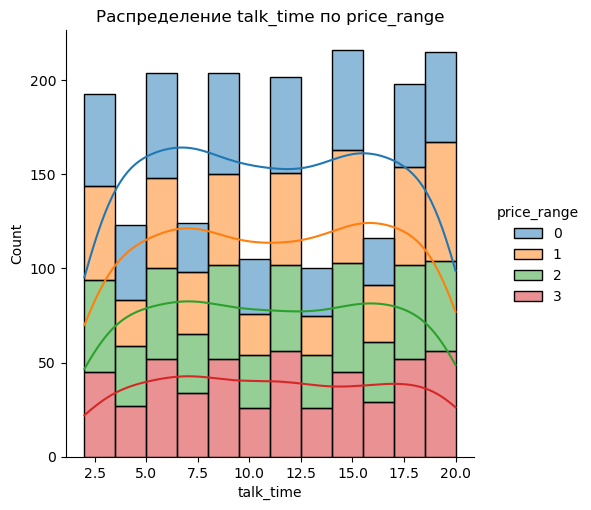

In [13]:
# Список признаков, которые мы проверяем на корреляцию с price_range
features = ['battery_power', 'clock_speed', 'fc', 'int_memory', 'mobile_wt', 
            'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']

# Целевая переменная
target = 'price_range'

# Построение распределений для каждого признака
for feature in features:
    sns.displot(data=df, x=feature, hue=target, kde=True, multiple='stack')
    plt.title(f'Распределение {feature} по price_range')
    plt.show()


# Сохранение датасета

In [14]:
df.to_pickle(path + "/data/train.pkl")

# Выводы

* На основе первичного анализа, можно сказать, что цена зависит от объема ОЗУ, от мощности батареи, а так же от плотности пикселей в телефоне.
* Произведено знакомство с датасетом, а так же уменьшение его веса без потери информации 